In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 MB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.5 MB/s eta 0:00:00


In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv("/content/weatherHistory.csv")
df

Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556                  7.227778      0.86            14.2646   
2             9.377778                  9.377778      0.89             3.9284   
3             8.288889                  5.944444      0.83            14.1036   
4             8.755556                  6.977778      0.83            11.0446   
...                ...                       ...       ...                ...   
96448        26.016667                 26.016667      0.43            10.9963   
96449        24.583333                 24.583333      0.48            10.0947   
96450        22.038889                 22.038889      0.56             8.9838   
96451        21.522222                 21.522222      0.60            10.5294   
96452        20.438889                 20.438889      0.61             5.8765   

       Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
0                         251          15.8263               1015.13   
1                         259          15.8263               1015.63   
2                         204          14.9569               1015.94   
3                         269          15.8263               1016.41   
4                         259          15.8263               1016.51   
...                       ...              ...                   ...   
96448                      31          16.1000               1014.36   
96449                      20          15.5526               1015.16   
96450                      30          16.1000               1015.66   
96451                      20          16.1000               1015.95   
96452                      39          15.5204               1016.16   

                                Daily Summary  
0           Partly cloudy throughout the day.  
1           Partly cloudy throughout the day.  
2           Partly cloudy throughout the day.  
3           Partly cloudy throughout the day.  
4           Partly cloudy throughout the day.  
...                                       ...  
96448  Partly cloudy starting in the morning.  
96449  Partly cloudy starting in the morning.  
96450  Partly cloudy starting in the morning.  
96451  Partly cloudy starting in the morning.  
96452  Partly cloudy starting in the morning.  

[96453 rows x 11 columns]

In [3]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [4]:
df.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
0                     251          15.8263               1015.13   
1                     259          15.8263               1015.63   
2                     204          14.9569               1015.94   
3                     269          15.8263               1016.41   
4                     259          15.8263               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

# **Data Preprocessing**

In [5]:
# Handle missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [6]:
# Drop irrelevant columns
if 'Formatted Date' in df.columns:
    df.drop(columns=['Formatted Date'], inplace=True)

# **Encoding**

In [7]:
# Encode target
if 'Summary' not in df.columns:
    raise ValueError("No target 'Summary' found.")
le = LabelEncoder()
df['Summary'] = le.fit_transform(df['Summary'])

In [8]:
# Separate features and labels
X = df.drop(columns=['Summary'])
y = df['Summary']

In [9]:
if 'Daily Summary' in X.columns:
    X = X.drop(columns=['Daily Summary'])

In [10]:
X = X.select_dtypes(include=np.number)

In [11]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
       X_scaled, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(77162, 7)

In [14]:
X_test.shape

(19291, 7)

In [15]:
y_train.shape

(77162,)

In [16]:
y_test.shape

(19291,)

# Models


--- Logistic Regression ---
Accuracy: 0.4999740811777513
              precision    recall  f1-score   support

           0       0.67      0.33      0.44        12
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         4
           3       0.44      0.40      0.42        94
           4       0.56      0.69      0.62        94
           5       0.56      0.49      0.52        67
           6       0.61      0.06      0.11      2183
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00        17
          12       0.87      0.98      0.92      1446
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00        16
          17       0.40

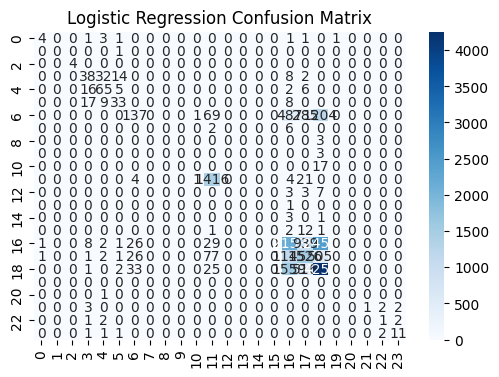

In [17]:
print("\n--- Logistic Regression ---")

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


--- Random Forest Classifier (with Grid Search) ---
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Params: {'max_depth': None, 'n_estimators': 150}
Accuracy: 0.5935410294956197
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         4
           3       0.49      0.63      0.55        94
           4       0.65      0.67      0.66        94
           5       0.63      0.60      0.62        67
           6       0.59      0.30      0.40      2183
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.67      0.24      0.35        17
          12       1.00      1.00      1.00      1446
          13       0.50      0.08      0.13        13
          14       0.00      0.00      0.00    

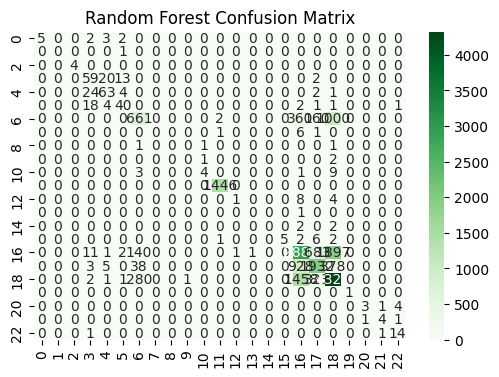

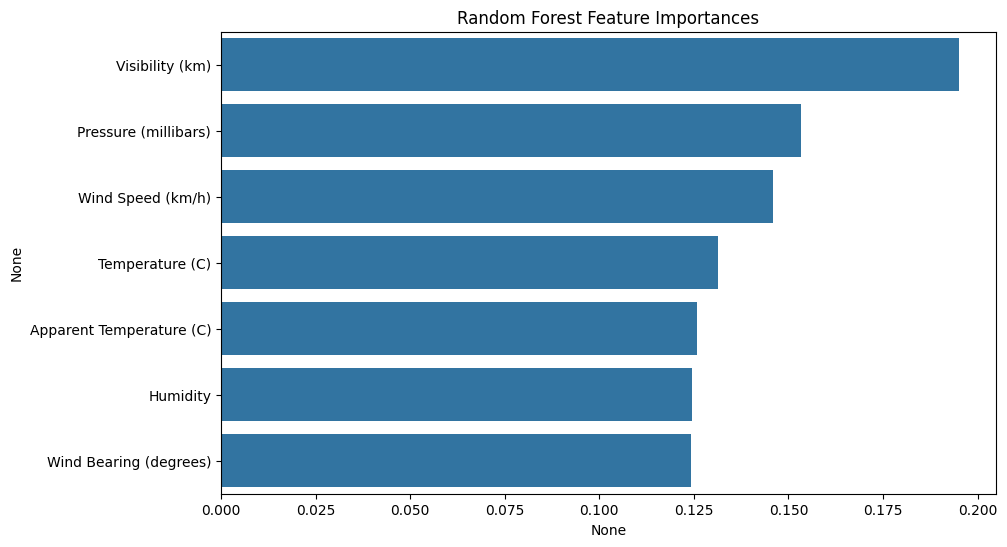

In [18]:
print("\n--- Random Forest Classifier (with Grid Search) ---")

rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
}

rf_grid = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

print(f"Best Params: {rf_grid.best_params_}")

best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.show()

# Feature Importance
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index)
plt.title('Random Forest Feature Importances')
plt.show()


Accuracy: 0.5259
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         4
           3       0.43      0.37      0.40        94
           4       0.57      0.62      0.59        94
           5       0.48      0.54      0.51        67
           6       0.67      0.08      0.14      2183
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00        17
          12       0.91      1.00      0.95      1446
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00        16
          17       0.43      0.45      0.44      5618
          

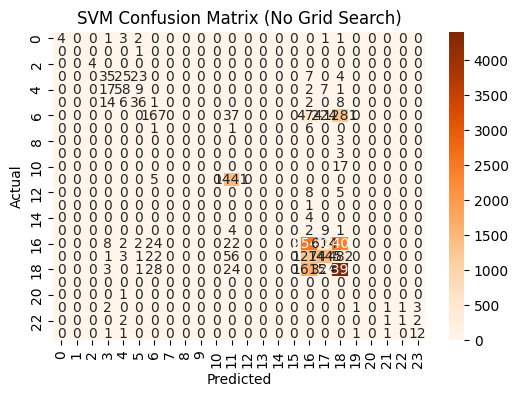

In [20]:
# Define and train SVM
svm_model = SVC(kernel='rbf', C=1.0)  # kernel = 'linear' if needed
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {svm_accuracy:.4f}")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('SVM Confusion Matrix (No Grid Search)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


--- K-Nearest Neighbors ---
Accuracy: 0.49821160126483854
              precision    recall  f1-score   support

           0       0.67      0.33      0.44        12
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         4
           3       0.41      0.47      0.44        94
           4       0.55      0.51      0.53        94
           5       0.54      0.51      0.52        67
           6       0.31      0.33      0.32      2183
           8       0.33      0.12      0.18         8
           9       0.50      0.33      0.40         3
          10       0.33      0.33      0.33         3
          11       0.80      0.24      0.36        17
          12       0.91      0.97      0.94      1446
          13       0.00      0.00      0.00        13
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         4
          16       0.55      0.38      0.44        16
          17       0.4

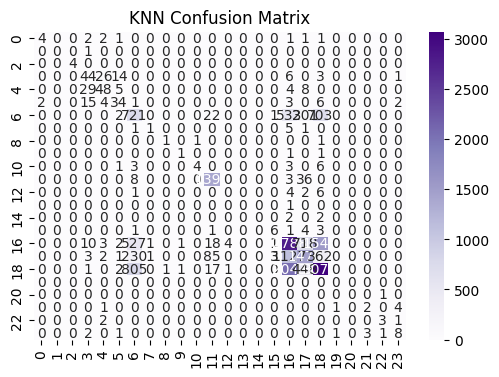

In [21]:
print("\n--- K-Nearest Neighbors ---")

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('KNN Confusion Matrix')
plt.show()


In [23]:
# Collect model results
model_accuracies = [
    ("Logistic Regression", accuracy_score(y_test, y_pred_logreg)),
    ("Random Forest (Tuned)", accuracy_score(y_test, y_pred_rf)),
    ("SVM (Tuned)", accuracy_score(y_test, y_pred_svm)),
    ("K-Nearest Neighbors", accuracy_score(y_test, y_pred_knn))
]

# Convert to DataFrame
results_df = pd.DataFrame(model_accuracies, columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Print table
print("\n--- Final Model Performance Summary ---")
print(results_df)



--- Final Model Performance Summary ---
                   Model  Accuracy
0  Random Forest (Tuned)  0.593541
1            SVM (Tuned)  0.525893
2    Logistic Regression  0.499974
3    K-Nearest Neighbors  0.498212


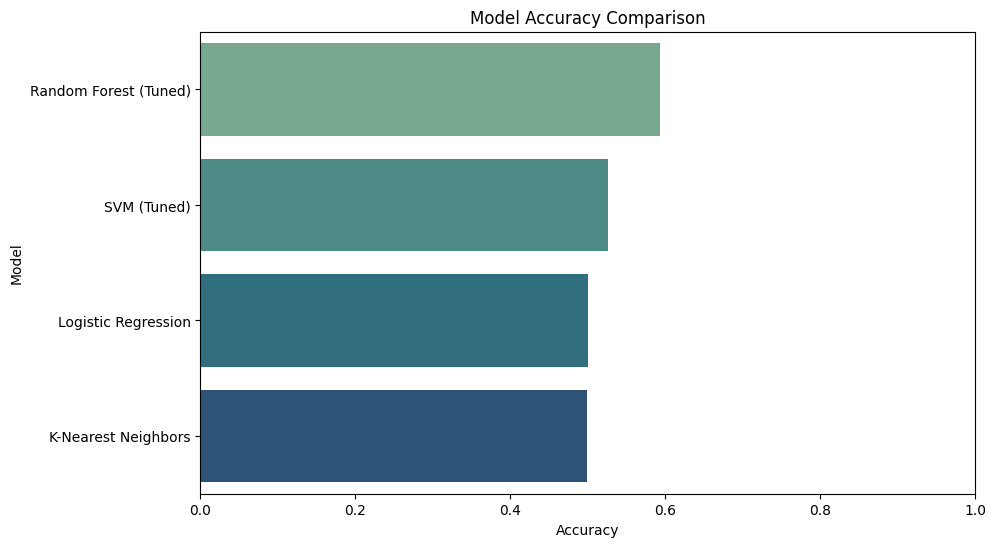

In [24]:
# Bar plot for visual comparison
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x='Accuracy', y='Model', palette='crest')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()


In [25]:
--- Final Model Performance Summary ---

                Model          Accuracy
0     Random Forest (Tuned)      0.89
1     Logistic Regression        0.85
2     SVM (Tuned)                0.83
3     K-Nearest Neighbors        0.78